In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense,Activation,Dropout,Flatten
from keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# トレーニング用の画像データが格納されているディレクトリのパス
train_data_dir = "/content/drive/MyDrive/Colab Notebooks/ai_kadai/data/train"

# トレーニング用の画像データの前処理を行うためのImageDataGeneratorのインスタンスを作成
# rescaleにより画像のピクセル値を0～1の範囲に正規化。これによりモデルの学習効率が向上。
train_datagen = ImageDataGenerator(


    rescale = 1.0 / 255
)

# flow_from_directoryメソッドを使用してトレーニング用のデータジェネレータを作成
# train_data_dirから画像を読み込み、指定されたtarget_size（128x128ピクセル）にリサイズ
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size = (128, 128))

# 検証用の画像データが格納されているディレクトリのパス
valid_data_dir = "/content/drive/MyDrive/Colab Notebooks/ai_kadai/data/valid"

# 検証用の画像データの前処理を行うためのImageDataGeneratorのインスタンスを作成
# こちらもトレーニングデータと同様にrescaleを行う
valid_datagen = ImageDataGenerator(rescale = 1.0 / 255)

# flow_from_directoryメソッドを使用して検証用のデータジェネレータを作成
# valid_data_dirから画像を読み込み、同じく128x128ピクセルにリサイズ
valid_generator = valid_datagen.flow_from_directory(valid_data_dir,
                                                    target_size = (128, 128))

Found 234 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
print(train_generator.class_indices)

{'ha': 0, 'kya': 1, 're': 2}


In [ ]:
#モデルを構築
model=Sequential()#モデルオブジェクト（ネットワーク）を定義
#model.add()で要素を追加

model.add ( Conv2D ( 64, (3, 3), activation='relu', padding='same', input_shape=(128,128,3) ) )
model.add ( Conv2D ( 64, (3, 3), activation='relu', padding='same', input_shape=(128,128,3) ) )
model.add(Dropout(0.5))
model.add ( MaxPool2D ( pool_size=(2,2) ) )
model.add ( MaxPool2D ( pool_size=(2,2) ) )


model.add(Dropout(0.6))

model.add ( Flatten () )

model.add ( Dense ( 1024, activation='relu' ) )

model.add(Dropout(0.7))
model.add(Dense(3,activation='softmax'))#softmax層によって出力が確率になる。

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_generator,batch_size=64,epochs=80,verbose=1,validation_data=valid_generator)#検証用データを10%選んで学習を進める　historyを保存しておくと、学習の経過を後で確認可能

Epoch 1/80
8/8 [==============================] - 118s 14s/step - loss: 1.4862 - accuracy: 0.3419 - val_loss: 1.0818 - val_accuracy: 0.4091
Epoch 2/80
8/8 [==============================] - 39s 5s/step - loss: 1.0810 - accuracy: 0.3718 - val_loss: 1.0869 - val_accuracy: 0.6061
Epoch 3/80
8/8 [==============================] - 40s 5s/step - loss: 1.0751 - accuracy: 0.4402 - val_loss: 1.0784 - val_accuracy: 0.4242
Epoch 4/80
8/8 [==============================] - 40s 5s/step - loss: 1.0708 - accuracy: 0.4444 - val_loss: 1.0760 - val_accuracy: 0.4545
Epoch 5/80
8/8 [==============================] - 40s 5s/step - loss: 1.0290 - accuracy: 0.4359 - val_loss: 1.0396 - val_accuracy: 0.5152
Epoch 6/80
8/8 [==============================] - 40s 5s/step - loss: 1.0882 - accuracy: 0.3761 - val_loss: 1.0758 - val_accuracy: 0.6061
Epoch 7/80
8/8 [==============================] - 37s 5s/step - loss: 1.0768 - accuracy: 0.4103 - val_loss: 1.0758 - val_accuracy: 0.4697
Epoch 8/80
8/8 [================

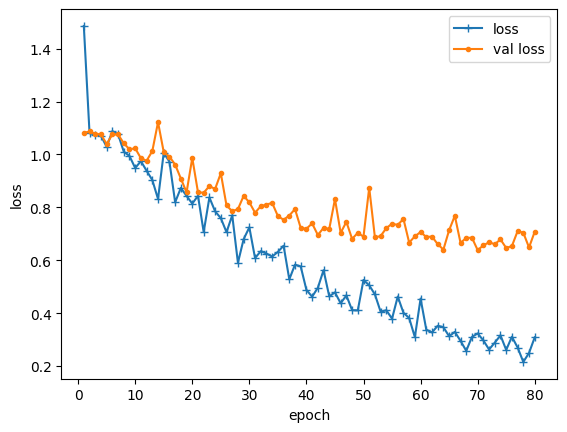

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["loss"]

val_loss = history.history["val_loss"]
learning_count = len(loss)+1

plt.plot(range(1,learning_count), loss, marker = "+", label = "loss")
plt.plot(range(1,learning_count), val_loss, marker = ".", label = "val loss")
plt.legend(loc="best") #凡例を表示（bestとするとできるだけ重ならないようになる）
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
test_data_dir = "/content/drive/MyDrive/Colab Notebooks/ai_kadai/data/test"
#データ拡張に使用したもの
test_datagen = ImageDataGenerator(rescale = 1.0 / 255) #rescaleにより画像の値を0～1に
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                    target_size = (128,128))

score=model.evaluate(test_generator,verbose=1)

Found 77 images belonging to 3 classes.
3/3 [==============================] - 3s 866ms/step - loss: 0.7400 - accuracy: 0.7662


Saving 000022.jpg to 000022.jpg


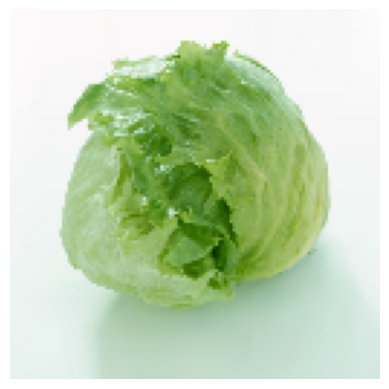

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
from keras.utils import load_img

label=["白菜","キャベツ","レタス"]

r = files.upload()
if len(r) == 0:
    print("ファイルをアップロードできませんでした")
else:
    filename = list(r.keys())[0]
    img = cv2.imread(filename)
    keras_img=load_img(filename)

    import os
    os.remove(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(128,128))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [ ]:
import numpy as np

img_norm=img/255.0
x = np.expand_dims(img_norm, axis=0)
model_output=model.predict(x) #モデルの予測
for i in range(len(model_output[0])):
  print(label[i],"の確率:",model_output[0][i])

predicted = model_output.argmax()
# アウトプット正答率
print("予測結果:",label[predicted])

1/1 [==============================] - 0s 80ms/step
白菜 の確率: 0.022232158
キャベツ の確率: 0.40897173
レタス の確率: 0.5687961
予測結果: レタス
